## Previous Version

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))

num_of_particles = 10


def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    sorted_arr = arr[sort_order]
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])


# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")


# Create a positions array to sort the elements based on which previous particle
# that they are resampled from.
# This cleans up the visualization and prevents lines from crossing. 
    
# We don't want to sort the index arrays themselves,
# as this will provide false information as to where each particle came from.
    
positions = np.zeros_like(resampling_indices, dtype=int)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    positions[step] = unique_ranks(resampling_indices[step])
    

for step in range(1, len(positions)):
    
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.5)

# TODO: Trace the ending particles back through the chart in red
prev_indices = resampling_indices[-1]

for step in range(len(resampling_indices) - 1, 0, -1):
    utilized_particles = []
    for p in range(num_of_particles):
        if p in prev_indices:
            plt.plot([step-1, step], [resampling_indices[step - 1][p], positions[step][p]], linestyle='solid', color='red', linewidth=0.5)

            utilized_particles.append(resampling_indices[step-1][p])
    
    prev_indices = utilized_particles


plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()


I want to rework the red-line algorithm. 
Possibly initializing an empty/null array with len(num_of_particles).
Then inserting utilized particles by changing null to the resample_index.   
And then iterating through that to determine where to draw lines. 

Array 1: [0. 1. 2. 3. 4.] ... [5. 6. 7. 8. 9.]
Array 2: [5. 0. 3. 3. 7.] ... [9. 3. 5. 2. 4.]
Array 3: [7. 6. 8. 8. 1.] ... [6. 7. 7. 8. 1.]
Array 4: [1. 1. 1. 1. 1.] ... [1. 1. 1. 1. 1.]
Array 5: [5. 9. 8. 9. 4.] ... [3. 0. 3. 5. 0.]
Array 6: [2. 3. 8. 1. 3.] ... [3. 3. 7. 0. 1.]
Array 7: [9. 9. 0. 4. 7.] ... [3. 2. 7. 2. 0.]
Array 8: [1. 1. 1. 1. 1.] ... [9. 9. 9. 9. 9.]
Array 9: [0. 4. 5. 5. 6.] ... [8. 4. 1. 4. 9.]
Array 10: [8. 1. 1. 7. 9.] ... [9. 3. 6. 7. 2.]


IndexError: index 10 is out of bounds for axis 0 with size 10

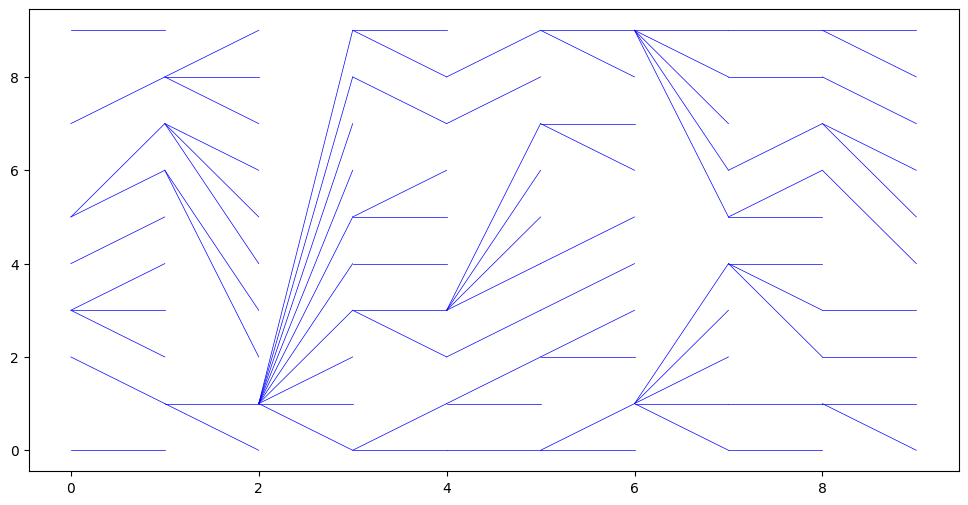

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))

num_of_particles = 10


def unique_ranks(arr):
    # Sort the array and get indices
    sort_order = np.argsort(arr)
    sorted_arr = arr[sort_order]
    
    # Initialize the rank array with zeros
    ranks = np.zeros_like(arr)
    
    # The first element in the sorted array gets the first rank
    current_rank = 0
    ranks[sort_order[0]] = current_rank
    
    # Iterate over the sorted array to assign ranks
    for i in range(1, len(arr)):
        # Increase the rank only if the current value is different from the previous
        if sorted_arr[i] != sorted_arr[i - 1]:
            current_rank += 1
        # Assign the next rank, making sure it's unique by adding the difference from 'i'
        ranks[sort_order[i]] = current_rank + (i - current_rank)
        
    return ranks


# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 1 prev. particle
    np.ones(num_of_particles),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
        # simulate all particles being sampled from 2 prev. particles
    np.concatenate([np.ones(int(num_of_particles / 2)), num_of_particles - np.ones(int(num_of_particles / 2))]),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True),
    np.random.choice(np.arange(num_of_particles), num_of_particles, replace=True)
])


# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(resampling_indices):
    print(f"Array {i+1}: {arr[:5]} ... {arr[num_of_particles-5:]}")


# Create a positions array to sort the elements based on which previous particle
# that they are resampled from.
# This cleans up the visualization and prevents lines from crossing. 
    
# We don't want to sort the index arrays themselves,
# as this will provide false information as to where each particle came from.
    
positions = np.zeros_like(resampling_indices, dtype=int)
positions[0] = np.arange(num_of_particles)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    positions[step] = unique_ranks(resampling_indices[step])
    

for step in range(1, len(positions)):  
    for p in range(num_of_particles):
        plt.plot([step-1, step], [resampling_indices[step][p], positions[step, p]], linestyle='solid', color='blue', markersize=0.1, linewidth=0.5)

# Trace the lineage of final particles in red
prev_indices = resampling_indices[-1]

for step in range(len(resampling_indices) - 1, 0, -1):
    next_particles = np.zeros(num_of_particles, dtype=int)
    for p in range(num_of_particles):
        if (prev_indices[p] != 0) and (p in prev_indices):
            plt.plot([step-1, step], [resampling_indices[step - 1][p], positions[step][p]], linestyle='solid', color='red', linewidth=0.5)

            next_particles[p] = resampling_indices[step] 
    
    prev_indices = next_particles


plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()
